# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
#Observable Trend 1: Latitude doesn't have a correlation with wind speed and humidity

#Observable Trend 2: Highest temperature is found at 32 latitude 

#Observable Trend 3: Southern Hemisphere climate is a bit warmer than the Northern Hemisphere. This is because the Southern Hemisphere has more water bodies 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
lat = []
lng = []
city_name = []
cloud = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : klaksvik
Processing Record 2 of Set 1 : ushuaia
Processing Record 3 of Set 1 : nanortalik
Processing Record 4 of Set 1 : rikitea
Processing Record 5 of Set 1 : ballina
Processing Record 6 of Set 1 : genhe
Processing Record 7 of Set 1 : castro
Processing Record 8 of Set 1 : saint-pierre
Processing Record 9 of Set 1 : kahului
Processing Record 10 of Set 1 : lompoc
Processing Record 11 of Set 1 : punta arenas
Processing Record 12 of Set 1 : waddan
Processing Record 13 of Set 1 : pevek
Processing Record 14 of Set 1 : mataura
Processing Record 15 of Set 1 : yerbogachen
Processing Record 16 of Set 1 : thompson
Processing Record 17 of Set 1 : buala
Processing Record 18 of Set 1 : port blair
Processing Record 19 of Set 1 : pacific grove
Processing Record 20 of Set 1 : batagay-alyta
Processing Record 21 of Set 1 : itacare
Processing Record 22 of Set 1 : puerto ayora
Processing Record 23 of Set 1 : nizhneangar

Processing Record 39 of Set 4 : tigil
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 : kampot
Processing Record 41 of Set 4 : ngunguru
Processing Record 42 of Set 4 : souillac
Processing Record 43 of Set 4 : comodoro rivadavia
Processing Record 44 of Set 4 : oktyabrskiy
Processing Record 45 of Set 4 : sorokino
Processing Record 46 of Set 4 : adana
Processing Record 47 of Set 4 : vicuna
Processing Record 48 of Set 4 : longyearbyen
Processing Record 49 of Set 4 : alyangula
Processing Record 50 of Set 4 : monte escobedo
Processing Record 0 of Set 5 : tondano
Processing Record 1 of Set 5 : sirjan
Processing Record 2 of Set 5 : esperance
Processing Record 3 of Set 5 : deqing
Processing Record 4 of Set 5 : shetpe
Processing Record 5 of Set 5 : prince rupert
Processing Record 6 of Set 5 : northview
Processing Record 7 of Set 5 : belmonte
Processing Record 8 of Set 5 : shimoda
Processing Record 9 of Set 5 : los llanos de aridane
City not found. Skipping..

Processing Record 25 of Set 8 : warrington
Processing Record 26 of Set 8 : saint-joseph
Processing Record 27 of Set 8 : pentecoste
Processing Record 28 of Set 8 : kulachi
Processing Record 29 of Set 8 : dunmore town
Processing Record 30 of Set 8 : alma
Processing Record 31 of Set 8 : mangan
Processing Record 32 of Set 8 : kanth
Processing Record 33 of Set 8 : tiruttani
Processing Record 34 of Set 8 : boyolangu
Processing Record 35 of Set 8 : natal
Processing Record 36 of Set 8 : newport
Processing Record 37 of Set 8 : darhan
Processing Record 38 of Set 8 : kuybysheve
Processing Record 39 of Set 8 : biak
Processing Record 40 of Set 8 : lagos
Processing Record 41 of Set 8 : havoysund
Processing Record 42 of Set 8 : leningradskiy
Processing Record 43 of Set 8 : soyo
Processing Record 44 of Set 8 : colonia
Processing Record 45 of Set 8 : cayenne
Processing Record 46 of Set 8 : ust-kuyga
Processing Record 47 of Set 8 : tiznit
Processing Record 48 of Set 8 : boguchany
Processing Record 49 of

Processing Record 9 of Set 12 : shenjiamen
Processing Record 10 of Set 12 : bamut
Processing Record 11 of Set 12 : bitkine
Processing Record 12 of Set 12 : peterhead
Processing Record 13 of Set 12 : puerto carreno
Processing Record 14 of Set 12 : qax
Processing Record 15 of Set 12 : kolo
Processing Record 16 of Set 12 : portales
Processing Record 17 of Set 12 : byron bay
Processing Record 18 of Set 12 : ewa beach
Processing Record 19 of Set 12 : charters towers
Processing Record 20 of Set 12 : bowen
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data = pd.DataFrame({"City" : city_name, "Lat" : lat, "Lng" : lng, "Max Temp" : max_temp, "Humidity" : humidity,
                          "Cloudiness": cloud, "Wind Speed" : wind_speed, "Country" : country, "Date" : date})
city_data.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [9]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvík,62.23,-6.59,50.00,100,34,13.87,FO,1592804066
1,Ushuaia,-54.80,-68.30,33.80,86,28,6.93,AR,1592803623
2,Nanortalik,60.14,-45.24,45.18,75,74,5.82,GL,1592803629
3,Rikitea,-23.12,-134.97,70.34,68,71,17.09,PF,1592803619
4,Ballina,-28.87,153.57,66.20,39,0,13.87,AU,1592804066


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,21.286489,15.124406,68.817831,68.246127,46.989673,7.978726,1.592804e+09
std,33.195450,93.512029,14.240262,22.369692,36.394722,5.530174,2.141110e+02
min,-54.800000,-179.170000,33.800000,3.000000,0.000000,0.630000,1.592803e+09
25%,-7.260000,-68.270000,57.200000,54.000000,11.000000,4.160000,1.592804e+09
50%,27.800000,16.430000,69.800000,74.000000,40.000000,6.930000,1.592804e+09
75%,49.630000,102.280000,80.260000,86.000000,81.000000,10.290000,1.592804e+09
max,78.220000,179.320000,110.820000,100.000000,100.000000,58.000000,1.592804e+09


In [44]:
#  Get the indices of cities that have humidity over 100%.


In [114]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
city_data.to_csv("output/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

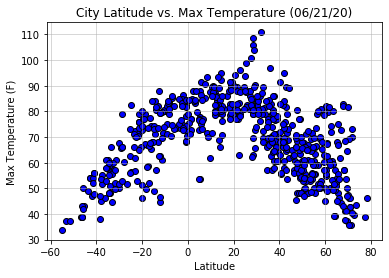

The Latitude vs. Temperature Plot shows that the highest temperature is found at about 32 latitude


In [30]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', alpha = 0.5, linewidth=1)
plt.savefig("Output/City Latitude vs Max Temperature.png")
plt.show()

print("The Latitude vs. Temperature Plot shows that the highest temperature is found at about 32 latitude")

## Latitude vs. Humidity Plot

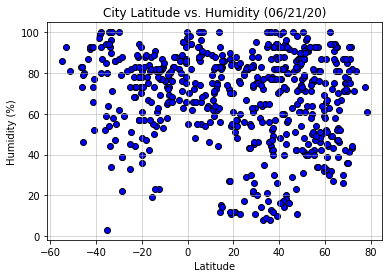

The Latitude vs. Humidity Plot shows that as the latitude gets higher, humidity also gets higher


In [13]:
plt.scatter(city_data["Lat"], city_data["Humidity"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', alpha = 0.5, linewidth=1)
plt.savefig("Output/City Latitude vs Humidity.png")
plt.show()

print("The Latitude vs. Humidity Plot shows that as the latitude gets higher, humidity also gets higher")

## Latitude vs. Cloudiness Plot

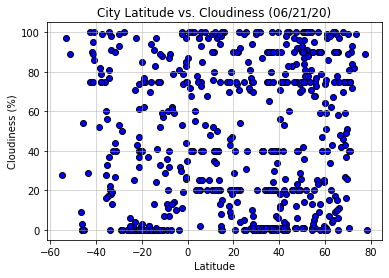

The Latitude vs. Cloudiness Plot shows that the Cloudiness data is widely spread across the latitude


In [14]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', alpha = 0.5, linewidth=1)
plt.savefig("Output/City Latitude vs Cloudiness.png")
plt.show()

print("The Latitude vs. Cloudiness Plot shows that the Cloudiness data is widely spread across the latitude")

## Latitude vs. Wind Speed Plot

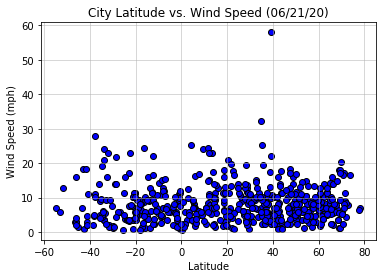

The Latitude vs. Wind Speed Plot shows that the Wind Speed data is widely spread across the latitude


In [15]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', alpha = 0.5, linewidth=1)
plt.savefig("Output/City Latitude vs Wind Speed.png")
plt.show()

print("The Latitude vs. Wind Speed Plot shows that the Wind Speed data is widely spread across the latitude")

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y):
    print(f"The r-squared is : {(st.pearsonr(x, y)[0])}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=20,color="red")

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data.loc[city_data["Lat"] >= 0]
southern_hemisphere = city_data.loc[city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.6751766526521213


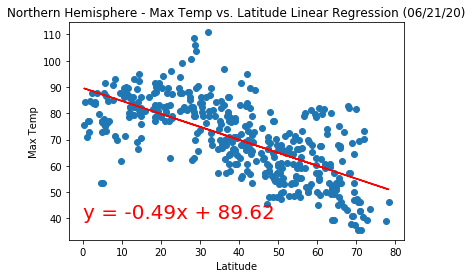

There is a moderate negative correlation between latitude and max temperature for northern hemisphere


In [18]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 40)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Output/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

print("There is a moderate negative correlation between latitude and max temperature for northern hemisphere")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.7858430628101708


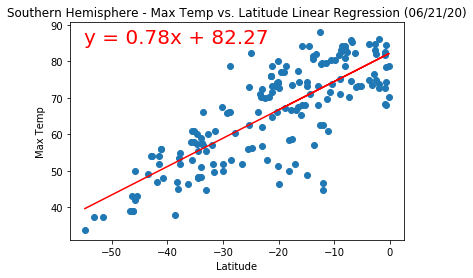

There is a strong positive correlation between latitude and max temperature for southern hemisphere


In [19]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
annotate(equation, -55, 85)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

print("There is a strong positive correlation between latitude and max temperature for southern hemisphere")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.04511653828903403


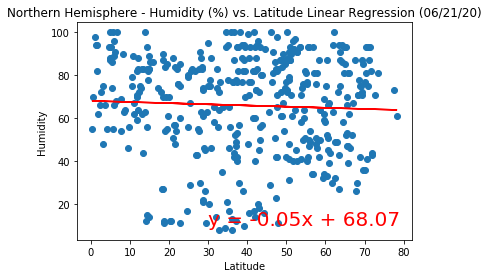

There is no correlation between latitude and humidity for northern hemisphere


In [21]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 30, 10)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Output/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

print("There is no correlation between latitude and humidity for northern hemisphere")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.001904876360623954


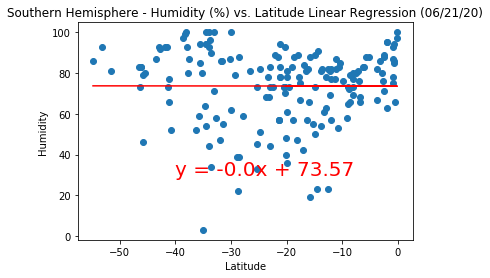

There is no correlation between latitude and humidity for southern hemisphere


In [22]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -40, 30)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Output/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

print("There is no correlation between latitude and humidity for southern hemisphere")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.047299676633577724


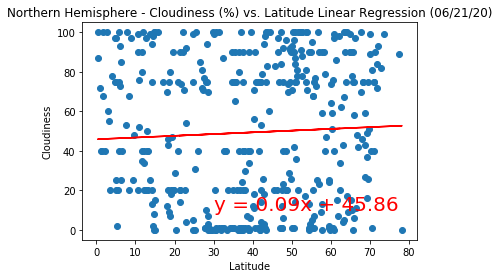

There is no correlation between latitude and cloudiness for northern hemisphere


In [23]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 30, 10)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Output/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

print("There is no correlation between latitude and cloudiness for northern hemisphere")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.056795536831748115


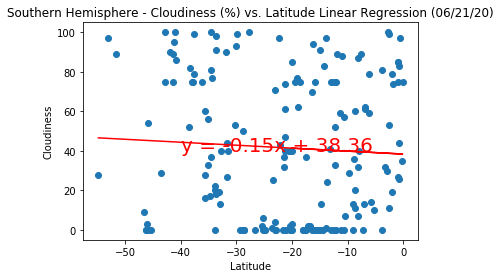

There is a very weak negative correlation between latitude and cloudiness for southern hemisphere


In [24]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -40, 40)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Output/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

print("There is a very weak negative correlation between latitude and cloudiness for southern hemisphere")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.02159782870693966


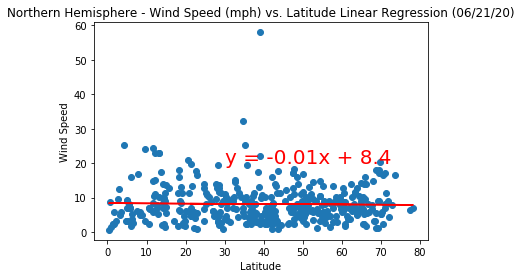

There is no correlation between latitude and wind speed for northern hemisphere


In [25]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 30, 20)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Output/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

print("There is no correlation between latitude and wind speed for northern hemisphere")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.03624166046094831


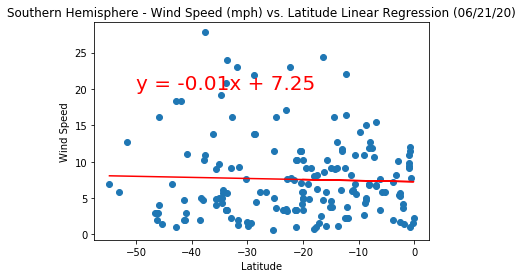

There is no negative correlation between latitude and wind speed for southern hemisphere


In [27]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -50, 20)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (06/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Output/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

print("There is no negative correlation between latitude and wind speed for southern hemisphere")